# Symulator kolejki M/M/C
## Projekt
Statystyka i teoria obsługi masowej.

Informatyka, stopień II, semestr I.

Grupa projektowa:
- Artur Bednarczyk

## Teoria
### Notacja Kendala
Notacja zaproponowana przez Davida G. Kednalla w 1953 roku dotyczy opisów systemów kolejkowych. Wygląda ona w następujący sposób:

**A/B/c/L/N**, gdzie kolejne składowe oznaczają:
- A - rozkład zmiennej losowej określającej czas między kolejnymi zgłoszeniami
- B - rozkład zmiennej losowej określającej czas obsługi zgłoszenia
- c - liczba równoległych stanowisk obsługujących zgłoszenia
- L - bufor, rozmiar kolejki (domyślnie - nieskończona)
- N - wymiar źródła zgłoszeń (domyślnie - nieskończone) 

### M/M/C
Zgodnie z notacją Kendalla system kolejkowy M/M/C to system z czasem miedzy kolejnymi zgłoszeniami o rozkładzie wykładniczym, czasem obsługi zgłoszeń o rozkłądzie wykładniczym oraz `c` równoległych statowiskach obsługi. Kolejka nie jest ograniczona.
## Symulator
### Technologia
Symulacja systemu M/M/c została przygotowana w języku `Python`.
### Opis
Celem symulatora jest wykonanie dużej liczby symulacji kolejki. W tym celu została przygotowana klasa tworząca testy o losowych parametrach z wyznaczonego przedziału a następnie wykonująca symulacje wykorzystując wszystkie dostępne rdzenie procesora urządzenia na którym zostaje uruchomiona. W wyniku działania otrzymujemy plik o rozszerzeniu `.csv`, który zawiera wyniki z wszystkich symulacji. Kolejne kolumny to:
- Total Customers - liczba wszystkich zgłoszeń w systemie
- Serviced Customers - liczba obsłużonych zgłoszeń
- Not Serviced Customers - liczba nieobsłużonych zgłoszeń
- Service Mean Time - średni czas obsługi
- Service Rate - ustawione tempo obsługi
- Arrival Rate - ustawione tempo napływu zgłoszeń
- Servers Number - liczba stanowisk obsługi - serwerów
- Time Limit - limit czasowy
- Delay probability - obliczone prawdopodobieństwo opóźńienia
- System load - obliczone obciążenie systemu
- Average Customers - obliczona średnia liczba zgłoszeń w systemie
- Mean Service Time - obliczony średni czas obsługi
- Average Time In System - obliczony średni czas przebywania zgłoszenia w systemie

Wymienione kolumny to wyniki z symulacji komputerowej, ustawienia danej symulacji oraz wyniki z teoretycznego modelu dla danych ustawień.
Po za wynikiem ogólny zostaje również zapisane kilka całych procesów z symulacji. Wyniki takie zawierają ustawienia użyte w danej symulacji oraz cały przebieg procesu.
Wartości teoretyczne są obliczane tylko gdy dany process posiada stan stacjonarny. 
### Przykład użycia


In [1]:
from time import time
from main import Tester
tester = Tester(10)
tester.prepare_tests()
start_time = time()
tester.run_multi_process()
end_time = time()
tester.print_results(end_time - start_time)

  0%|          | 0/10 [00:00<?, ?it/s]

Number of tests: 10
CPU Process number: 4
Number of tests processed by each process:
[3, 3, 3, 1]
Progress bar might by little jumpy cause of multiprocessing


  0%|          | 0/10 [00:00<?, ?it/s].23it/s]


Tested in 0.9052073955535889s
Results saved to file '../results/results.csv'


Ustawienia są losowane dla każdego testu, tempo napływu oraz obsługi z przedziału 1 - 10, a liczba serwerów 2 - 5. Natomiast czas określony dla danego testu jest wzorem: `10 * (i % 10 + 1)`, gdzie `i` oznacza i-ty test.

Dla powyższego testu wyniki wyglądają następująco:

In [2]:
import pandas as pd

dataset = pd.read_csv("../results/results.csv", delimiter=";")
print(dataset)

   Total Customers  Serviced Customers  Not Serviced Customers  \
0               33                  32                       1   
1              181                 180                       1   
2              140                 140                       0   
3              303                 301                       2   
4              391                 389                       2   
5              238                 238                       0   
6              545                 545                       0   
7              586                 585                       1   
8              445                 444                       1   
9              872                 872                       0   

   Service Mean Time  Service Rate  Arrival Rate  Servers Number  Time Limit  \
0             0.2946      2.316917      2.777532               3          10   
1             0.1238      8.423231      9.125244               4          20   
2             0.1189      8.18843

In [3]:
process = pd.read_csv("../results/process-0.csv", delimiter=";")
print(process)

      Time    Event  Server id  Customer id  Customers in system
0   0.0000  ARRIVAL        NaN            0                    1
1   0.0000  SERVICE        0.0            0                    1
2   0.2477    LEAVE        0.0            0                    0
3   1.0701  ARRIVAL        NaN            1                    1
4   1.0701  SERVICE        0.0            1                    1
..     ...      ...        ...          ...                  ...
93  9.4842  ARRIVAL        NaN           31                    1
94  9.4842  SERVICE        0.0           31                    1
95  9.7516  ARRIVAL        NaN           32                    2
96  9.7516  SERVICE        2.0           32                    2
97  9.9405    LEAVE        0.0           31                    1

[98 rows x 5 columns]


In [4]:
with open("../results/process-0.txt", "r") as file:
    print(file.read())

Run with settings:
Service rate: 2.3169170825651264
Arrival rate: 2.777532237173036
Number of servers: 3
Time limit: 10
  Time  Event      Server id    Customer id    Customers in system
------  -------  -----------  -------------  ---------------------
0       ARRIVAL                           0                      1
0       SERVICE            0              0                      1
0.2477  LEAVE              0              0                      0
1.0701  ARRIVAL                           1                      1
1.0701  SERVICE            0              1                      1
1.0895  ARRIVAL                           2                      2
1.0895  SERVICE            1              2                      2
1.1257  ARRIVAL                           3                      3
1.1257  SERVICE            2              3                      3
1.5051  LEAVE              1              2                      2
1.7418  LEAVE              2              3                      1
1.7716  L

Przygotowany został również graficzny interpreter powyższych wyników. Plik `.csv` zawierający proces może zostać wykorzystany do wyświetlenia wykresu przedstawiającego cały proces oraz wykresu przedstawiającego liczbę zgłoszeń występującą w systemie oraz jak wiele razy taka liczba wystąpiła.

Run with settings:
Service rate: 2.3169170825651264
Arrival rate: 2.777532237173036
Number of servers: 3
Time limit: 10



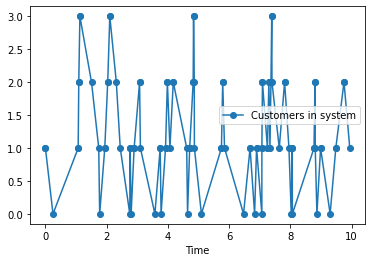

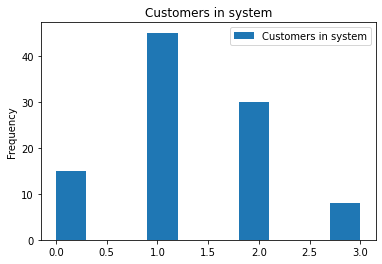

Run with settings:
Service rate: 5.345312679658383
Arrival rate: 7.236504292898325
Number of servers: 2
Time limit: 40



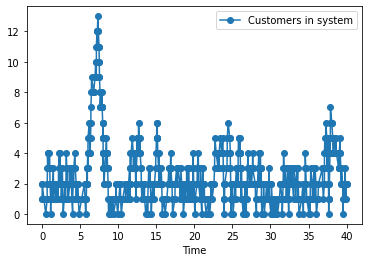

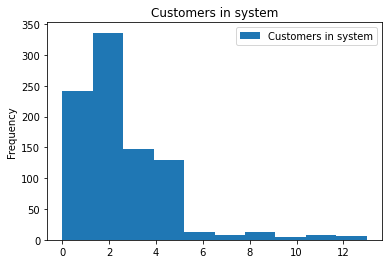

Run with settings:
Service rate: 5.067404501270209
Arrival rate: 8.186648714571568
Number of servers: 4
Time limit: 70



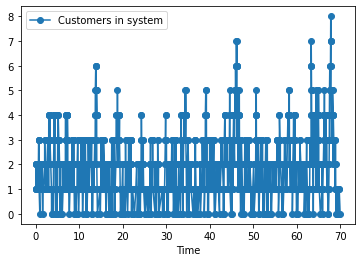

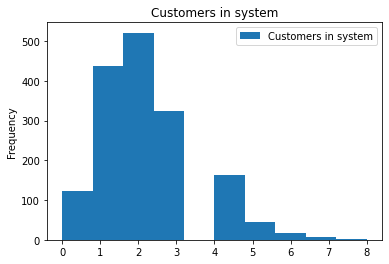

Run with settings:
Service rate: 6.943005621231408
Arrival rate: 9.042792520133345
Number of servers: 4
Time limit: 100



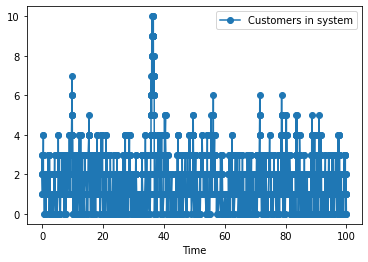

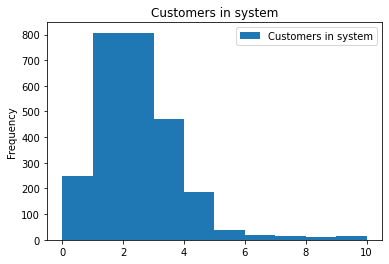

In [5]:
from resultAnalysis import Results
from matplotlib import pyplot as plt

Results().plot_process_from_file("../results/process-0")
plt.show()
Results().plot_process_from_file("../results/process-3")
plt.show()
Results().plot_process_from_file("../results/process-6")
plt.show()
Results().plot_process_from_file("../results/process-9")
plt.show()

## Wywołanie jednego testu

In [6]:
import time
from Simulator import MMC
from Utils import Utils


start = time.time()
model = MMC([1,3,3,30])
total, serviced, not_serviced, mean, process = model.run(4)
print(f"Całkowita liczba zgłoszeń: {total}")
print(f"Obsłużone: {serviced}")
print(f"Nie obsłużone: {not_serviced}")
print(f"Średni czas obsługi: {mean}")
end = time.time()
print(f"Czas symulacji: {round(end - start, 4)}")
print("Proces:")
Utils.print_table(process, ["CZAS", "ZDARZENIE", "SERWER", "ZGŁOSZENIE", "LICZBA ZGŁOSZEŃ W SYSTEMIE"])

Całkowita liczba zgłoszeń: 105
Obsłużone: 76
Nie obsłużone: 29
Średni czas obsługi: 1.124823988225653
Czas symulacji: 0.2786
Proces:
   CZAS  ZDARZENIE      SERWER    ZGŁOSZENIE    LICZBA ZGŁOSZEŃ W SYSTEMIE
-------  -----------  --------  ------------  ----------------------------
 0       ARRIVAL                           0                             1
 0       SERVICE             1             0                             1
 0.0375  ARRIVAL                           1                             2
 0.0375  SERVICE             0             1                             2
 0.0601  ARRIVAL                           2                             3
 0.0601  SERVICE             2             2                             3
 0.1249  ARRIVAL                           3                             4
 0.2305  ARRIVAL                           4                             5
 0.2808  ARRIVAL                           5                             6
 0.3277  ARRIVAL                          

## Analiza Statystyczna